In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

Using TensorFlow backend.


In [2]:
df = pd.read_csv("cretaceous_wells.csv")

In [3]:
df.head()

,Unnamed: 0,Company Number,Formation,Surface northing,Bottom hole northing,Surface easting,Bottom hole easting,Number of frac stages,Total slurry (bbl),Total proppant (lb),Lateral length (ft),Lateral azimuth (),IP oil (bbl),IP GOR,Cumulative oil (bbl),Cumulative days,IP oil API gravity ()
0,0,26,Turner,1.101721,1.101830,1.051392,1.051227,NaN,NaN,NaN,3831,75,96.0,0.0,784,185,NaN
1,1,9,Turner,1.091999,1.092278,1.056680,1.056723,NaN,NaN,125124.0,3533,339,NaN,NaN,116902,1590,NaN
2,2,8,Turner,1.088332,1.088023,1.054312,1.054274,12.0,NaN,1992847.0,3754,163,472.0,7.5,157218,3024,52.2
3,3,8,Turner,1.088317,1.088018,1.054622,1.054559,13.0,36638.0,1992421.0,4000,152,183.0,11.0,109167,2832,NaN
4,4,8,Turner,1.088386,1.088670,1.054247,1.054335,13.0,NaN,2027081.0,4072,322,232.0,9.1,79701,2634,NaN


In [4]:
company_well = {}

for index, row in df.iterrows():
    company_number = int(row['Company Number'])
    surface_coords = (row['Surface northing'], row['Surface easting'])
    if company_number not in company_well.keys():
        company_well[company_number] = []
    company_well[company_number].append(surface_coords)

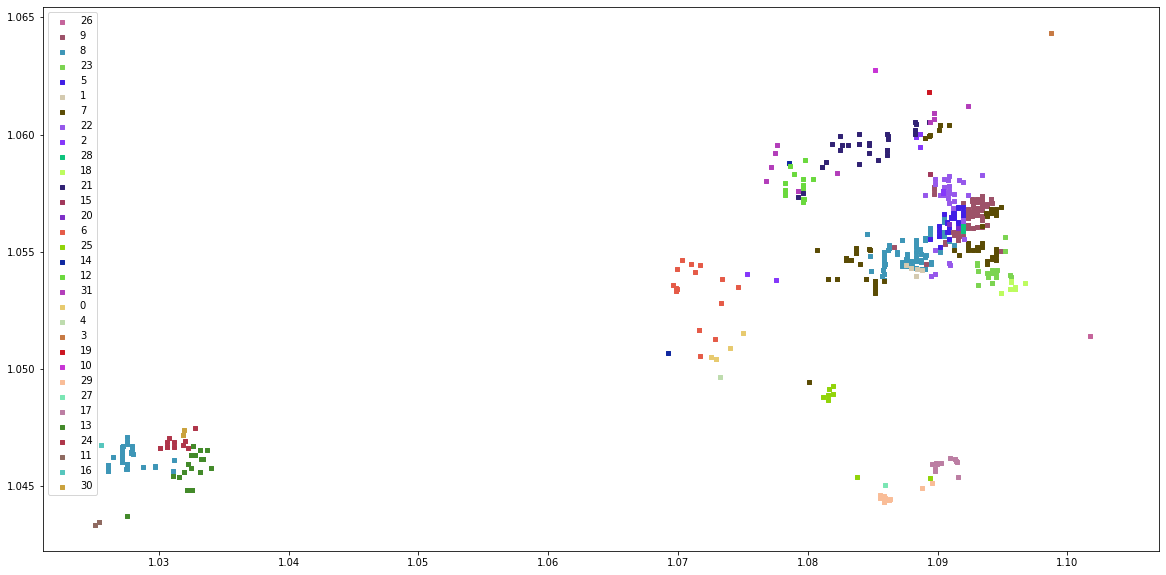

In [5]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

for company in company_well.keys():
    x = [coord[0] for coord in company_well[company]]
    y = [coord[1] for coord in company_well[company]]
    color = "#%06x" % random.randint(0, 0xFFFFFF)
    ax.scatter(x, y, s=10, c=color, marker="s", label=str(company))
    
plt.legend(loc='upper left');
plt.savefig('wells_by_company.png')
plt.show()

In [6]:
df.head()
df.shape

(593, 17)

In [7]:
surface_northing = df["Surface northing"]
surface_easting = df["Surface easting"]
cumulative_production = df["Cumulative oil (bbl)"]
cumulative_days = df["Cumulative days"]
y = cumulative_production / cumulative_days
X = [surface_northing, surface_easting]
X = []
for i in range(len(surface_northing)):
    X.append([surface_northing[i], surface_easting[i]])
X = np.array(X)
X

array([[1.101721  , 1.051392  ],
       [1.09199925, 1.0566802 ],
       [1.08833225, 1.0543121 ],
       ...,
       [1.03005725, 1.0466226 ],
       [1.03005725, 1.0466212 ],
       [1.03005725, 1.0466248 ]])

In [8]:
from sklearn.preprocessing import StandardScaler

model = Sequential()

model.add(Dense(2, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=5, batch_size=10)

test_data = np.array([[103005725, 1.0466226]])
model.predict(test_data)

Epoch 1/5
593/593 [==============================] - 0s 229us/step - loss: 70223.5519
Epoch 2/5
593/593 [==============================] - 0s 116us/step - loss: 70119.1687
Epoch 3/5
593/593 [==============================] - 0s 129us/step - loss: 70043.9234
Epoch 4/5
593/593 [==============================] - 0s 122us/step - loss: 70019.4050
Epoch 5/5
593/593 [==============================] - 0s 100us/step - loss: 69997.8410


array([[-1.1602508e+08]], dtype=float32)

In [9]:
import ipywidgets as widgets

widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, orientation='vertical', readout…